## Exercise MovieLens 电影数据分析

### 作业要求：（单人组）
Task1：在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（评分人数rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。

Task2：在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年

龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）

Task3：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云
等。


#### 读取moivelens 1M 数据（data目录）

- 1. user， movies， rating三个表

In [1]:
import numpy as np
import pandas as pd
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
ratings[int(1e6):int(1e6+10)]

,user_id,movie_id,rating,timestamp
1000000,6040,3552,2,956715942
1000001,6040,1952,5,957717017
1000002,6040,1954,3,960972782
1000003,6040,25,3,957717322
1000004,6040,348,2,956704972
1000005,6040,29,4,960972720
1000006,6040,1960,4,956715597
1000007,6040,1961,4,956703977
1000008,6040,1962,3,956715569
1000009,6040,1963,4,960972887


In [3]:
users.head(10)

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer
5,6,F,55117,50-55,homemaker
6,7,M,06810,35-44,academic/educator
7,8,M,11413,25-34,programmer
8,9,M,61614,25-34,technician/engineer
9,10,F,95370,35-44,academic/educator


In [4]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
# a = data_mat_freq @ data_mat_freq.T  # 20分钟
# np.save("data/movie_coRating_count",a ) #保存数组
# a[0]
# 该数组在data目录里作为环数据境下发，可以直接使用

In [6]:
# Reading movies info file
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [7]:
movies_info

,movie_id,name,genre,release_time,intro,directors,stars
0,1,Toy Story (1995),Animation|Adventure|Comedy,22 November 1995 (USA),A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles
1,2,Jumanji (1995),Adventure|Comedy|Family,15 December 1995 (USA),When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt
2,3,Grumpier Old Men (1995),Comedy|Romance,22 December 1995 (USA),John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,22 December 1995 (USA),"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine
4,5,Father of the Bride Part II (1995),Comedy|Family|Romance,8 December 1995 (USA),George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short
...,...,...,...,...,...,...,...
9737,193581,Kuroshitsuji: Book of the Atlantic (2017),Animation,21 January 2017 (Japan),A young lord and his demon butler board a luxu...,Noriyuki Abe|Stephen Hoff,Bryn Apprill|Dawn Michelle Bennett|Justin Briner
9738,193583,NÃ´gÃªmu nÃ´raifu: Zero (2017),Animation|Adventure|Comedy,19 July 2019 (China),"Adaption of the sixth Light Novel of series, i...",Atsuko Ishizuka,Alexandra Bedford|Jessica Boone|Ricardo Contreras
9739,193585,Flint (2017),Drama,TV Movie 28 October 2017,A woman deals with the toxic water scandal in ...,Bruce Beresford,Marin Ireland|Betsy Brandt|Queen Latifah
9740,193587,Bungou Stray Dogs: Dead Apple (2018),Animation,3 March 2018 (Japan),Rivalry between groups of criminals and detect...,Takuya Igarashi,Brian Beacock|Ray Chase|Lucien Dodge


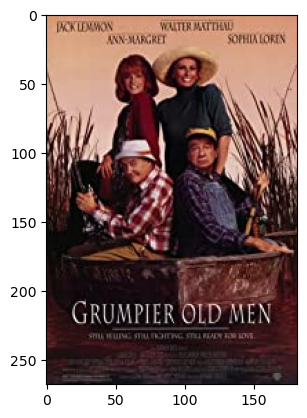

In [8]:
import matplotlib.pyplot as plt
import cv2 
poster_i = cv2.imread('data/poster/3.jpg',cv2.IMREAD_COLOR)
poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
plt.imshow(poster_i)  

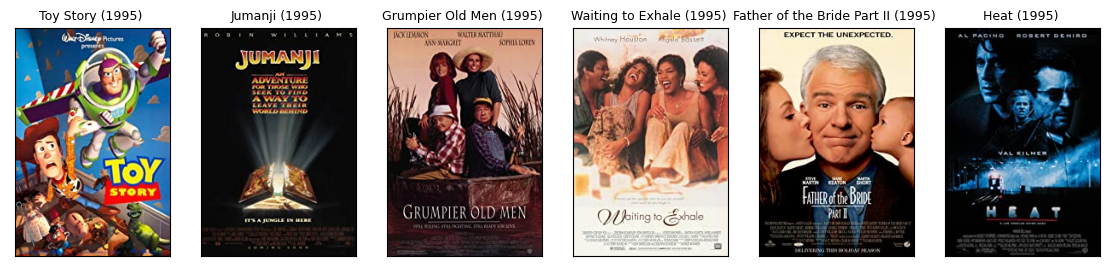

In [9]:
plt.figure(figsize=(14,10))
for i in movies_info[:6]['movie_id']:
    plt.subplot(1, 6, i)
    poster_i = cv2.imread('data/poster/'+ str(i) + '.jpg', 1)
    poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
    plt.imshow(poster_i)
    plt.title(movies_info.iloc[i-1]['name'], size=9)
    plt.xticks(())
    plt.yticks(())
plt.show()

## Task1：在movielens 1M的数据集上，统计分析观影的性别偏好。

### 综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（评分人数rating > 300）男性/女性 偏好电影。

In [10]:
# 从ratings中得到评分信息 从user表得到对应的性别信息
# 先把ratings和users表合并
movie_ratings_users = pd.merge(ratings, users, on='user_id')

# 按性别和电影分组
grouped = movie_ratings_users.groupby(['gender', 'movie_id']).agg({'rating': [np.size, np.mean]})
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)

# 筛选评分人数大于300的电影
popular_movies = grouped.query('rating_size > 300')

# 筛选男性/女性偏好电影
male_preference = popular_movies[popular_movies['gender'] == 'M'].sort_values('rating_mean', ascending=False).head(20)
female_preference = popular_movies[popular_movies['gender'] == 'F'].sort_values('rating_mean', ascending=False).head(20)

male_preference

,gender,movie_id,rating_size,rating_mean
4276,M,858,1740,4.583333
5303,M,2019,522,4.576628
3787,M,318,1600,4.560625
4579,M,1198,1942,4.520597
3530,M,50,1370,4.518248
3732,M,260,2344,4.495307
3989,M,527,1689,4.491415
4537,M,1148,644,4.478261
4182,M,745,477,4.473795
4315,M,904,759,4.472991


In [11]:
female_preference

,gender,movie_id,rating_size,rating_mean
504,F,527,615,4.562602
303,F,318,627,4.539075
48,F,50,413,4.513317
2412,F,2762,664,4.477410
1999,F,2324,367,4.422343
781,F,908,332,4.364458
792,F,919,507,4.355030
1049,F,1225,398,4.346734
1021,F,1197,636,4.342767
1022,F,1198,572,4.332168


### 针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。

In [108]:
#需要用到的数据包括电影类型（在movies表中），用户性别（在user表中），以及哪些用户看过哪些电影（在ratings）表中
#合并这三个表
movie_ratings = pd.merge(ratings, movies, on='movie_id')
movies_ratings_users = pd.merge(movie_ratings, users, on='user_id')
movies_ratings_users['user_id'] = 1

# 按照电影类型和性别进行分组，并统计每组的评分人数
grouped = movies_ratings_users.groupby(['genres', 'gender']).agg({'user_id': np.size})

# 重置索引，方便后续处理
grouped = grouped.reset_index()

# 重命名列名
grouped.columns = ['genres', 'gender', 'rating_size']

#grouped

In [109]:
# 将genres拆开
exploded_genres = grouped.assign(genres=grouped.genres.str.split('|')).explode('genres')

# 对拆开后的genres列进行分组计数
counted_genres = exploded_genres.groupby(['genres', 'gender']).sum()

# 重新设置 index，以方便后续绘图
counted_genres = counted_genres.reset_index()

#counted_genres.head()

In [110]:
# 筛选出性别为F的数据
female_ratings = counted_genres[counted_genres['gender'] == 'F']

# 按照rating_size降序排序
female_ratings = female_ratings.sort_values('rating_size', ascending=False)

female_ratings.head()

,genres,gender,rating_size
14,Drama,F,98153
8,Comedy,F,96271
26,Romance,F,50297
0,Action,F,45650
30,Thriller,F,40308


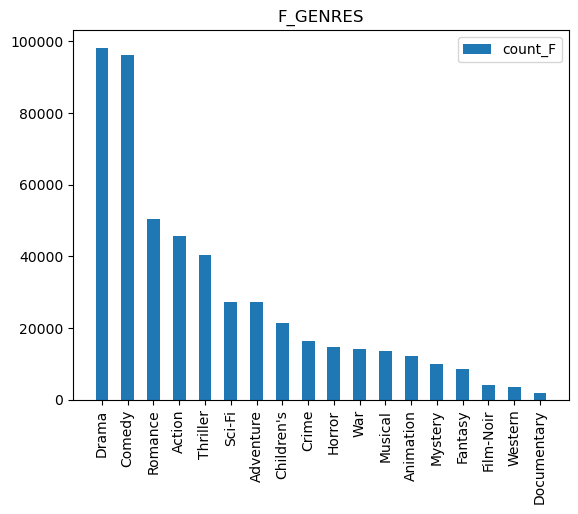

In [15]:
#画直方图
import matplotlib.pyplot as plt

# 设置x轴和y轴数据
x = female_ratings['genres']
y = female_ratings['rating_size']

plt.xticks(rotation=90)

# 绘制直方图
plt.bar(x, y, label='count_F', width=0.5)

plt.legend()

# 设置图标题
plt.title('F_GENRES')

# 显示图形
plt.show()

In [111]:
# 筛选出性别为M的数据
male_ratings = counted_genres[counted_genres['gender'] == 'M']

# 按照rating_size降序排序
male_ratings = male_ratings.sort_values('rating_size', ascending=False)
male_ratings.head()

,genres,gender,rating_size
9,Comedy,M,260309
15,Drama,M,256376
1,Action,M,211807
31,Thriller,M,149372
29,Sci-Fi,M,129894


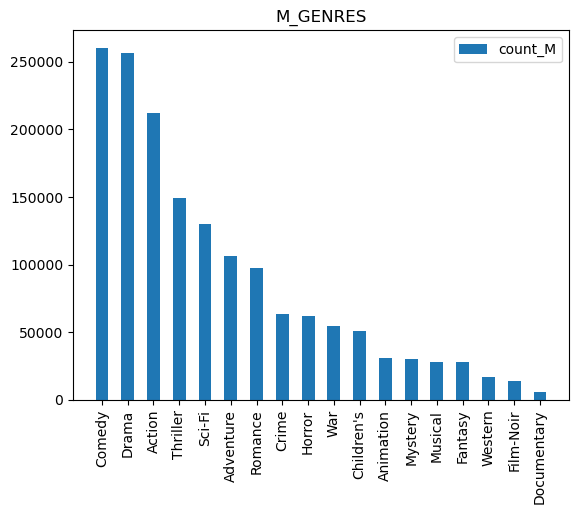

In [17]:
#画直方图
import matplotlib.pyplot as plt

# 设置x轴和y轴数据
x = male_ratings['genres']
y = male_ratings['rating_size']

plt.xticks(rotation=90)

# 绘制直方图
plt.bar(x, y, label='count_M', width=0.5)

plt.legend()

# 设置图标题
plt.title('M_GENRES')

# 显示图形
plt.show()

In [112]:
# female_ratings
# 求出female看过的所有电影的和
female_sum = female_ratings['rating_size'].sum()

#每种类型的电影在female中占的比例
female_ratings['rating_size']/=female_sum
female_ratings.head()

,genres,gender,rating_size
14,Drama,F,0.194002
8,Comedy,F,0.190283
26,Romance,F,0.099414
0,Action,F,0.090229
30,Thriller,F,0.079670


In [113]:
# male_ratings
# 求出male看过的所有电影的和
male_sum = male_ratings['rating_size'].sum() 

#每种类型的电影在female中占的比例
male_ratings['rating_size']/=male_sum
male_ratings.head()

,genres,gender,rating_size
9,Comedy,M,0.163113
15,Drama,M,0.160649
1,Action,M,0.132721
31,Thriller,M,0.093599
29,Sci-Fi,M,0.081393


In [20]:
# 先把genres排成相同顺序
female_ratings = female_ratings.sort_values(by='genres')
male_ratings = male_ratings.sort_values(by='genres')

# 取出电影类型和观看比例的数据
genres = female_ratings['genres']
female_rating_size = female_ratings['rating_size']
male_rating_size = male_ratings['rating_size']

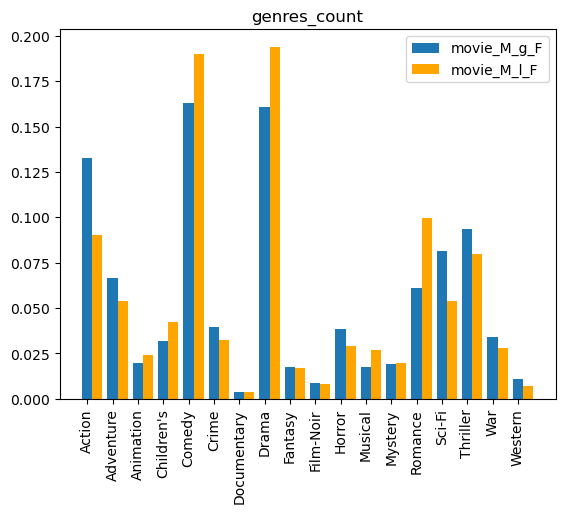

In [21]:
# 设置柱状图颜色和间隔
bar_width = 0.4
opacity = 0.8

# 绘制双色直方图
# 设置x轴刻度及标签
plt.xticks(range(len(female_ratings)), female_ratings['genres'], rotation='vertical')

plt.bar(range(len(female_ratings)), male_rating_size, bar_width, label='movie_M_g_F')
plt.bar(np.array(range(len(male_ratings))) + bar_width, female_rating_size, bar_width, color='orange', label='movie_M_l_F')

# 添加标题
plt.title('genres_count')
plt.xticks(rotation=90)
plt.legend()

# 显示图形
plt.show()


#### 男女对不同类型电影的喜好差别

In [98]:
#合并三个表
movie_ratings = pd.merge(ratings, movies, on='movie_id')
movies_ratings_users = pd.merge(movie_ratings, users, on='user_id')

In [99]:
# 用观影数>100的用户作为数据
grouped = movies_ratings_users.groupby('user_id')
movies_ratings_users = grouped.filter(lambda x: len(x) > 100)
#movies_ratings_users

In [100]:
# 将genres拆开
exploded_genres = movies_ratings_users.assign(genres=movies_ratings_users.genres.str.split('|')).explode('genres')

#exploded_genres

In [101]:
# 按照电影类型和性别进行分组，并统计每组的评分人数
exploded_genres['user_id'] = 1
grouped = exploded_genres.groupby(['genres', 'gender']).agg({'user_id': np.size, 'rating': np.mean})

# 重置索引，方便后续处理
grouped = grouped.reset_index()

# 重命名列名
grouped.columns = ['genres', 'gender', 'rating_size', 'rating_averge']

#grouped

In [102]:
#归一化 以消除男女样本数量不一样造成的影响
grouped_F = grouped[grouped['gender'] == 'F']
female_sum = grouped_F['rating_size'].sum()

grouped_M = grouped[grouped['gender'] == 'M']
male_sum = grouped_M['rating_size'].sum()

def modify_rating_size(row):
    if row['gender'] == 'F':
        return row['rating_size'] / female_sum
    else:
        return row['rating_size'] / male_sum

grouped['rating_portion'] = grouped.apply(modify_rating_size, axis=1)
#grouped

In [103]:
# 加一列表示喜欢的程度 这里定义为该性别观看该种电影的比例加平均评分 因为看得多也是喜欢的一种表现
grouped = grouped.assign(rating_love=grouped.rating_portion + grouped.rating_averge)
grouped.head()

,genres,gender,rating_size,rating_averge,rating_portion,rating_love
0,Action,F,36435,3.440620,0.090277,3.530898
1,Action,M,180575,3.442786,0.132595,3.575381
2,Adventure,F,21984,3.471252,0.054471,3.525723
3,Adventure,M,90920,3.421612,0.066762,3.488374
4,Animation,F,9513,3.714075,0.023571,3.737646


In [104]:
# 构建透视表，计算每个电影类型对应的男性和女性的平均评分
pivot_table = grouped.pivot_table(index='genres', columns='gender', values='rating_love', aggfunc='mean')

# 计算男性和女性对同一种电影类型的平均评分的差值，生成新的一列
pivot_table['rating_difference'] = pivot_table['M'] - pivot_table['F']

pivot_table = pivot_table.reset_index()

# 打印结果
#pivot_table

In [105]:
pivot_table = pivot_table.sort_values('rating_difference', ascending=False)
#pivot_table

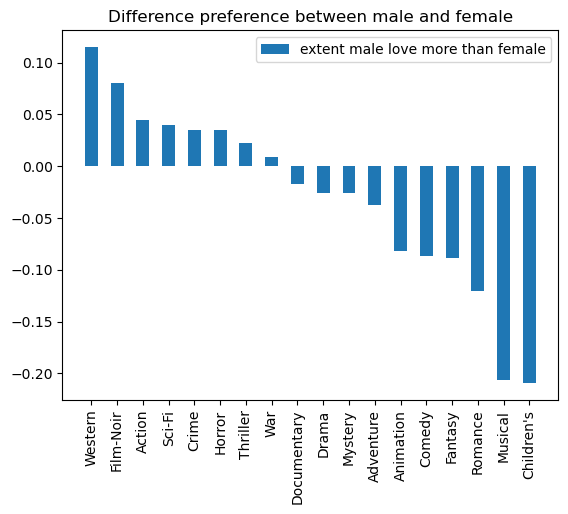

In [114]:
#可视化
#画直方图
import matplotlib.pyplot as plt

# 设置x轴和y轴数据
x = pivot_table['genres']
y = pivot_table['rating_difference']

plt.xticks(rotation=90)

# 绘制直方图
plt.bar(x, y, label='extent male love more than female', width=0.5)

plt.legend()

# 设置图标题
plt.title('Difference preference between male and female')

# 显示图形
plt.show()

## Task2：在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

### 拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

### 实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。

In [571]:
# 年龄和性别信息在user表里 要实现年龄预测和性别预测
# 通过观影和评分信息来预测 根据用户看过的电影和ta对这些电影的评分来进行预测

#合并三个表
movie_ratings = pd.merge(ratings, movies, on='movie_id')
movies_ratings_users = pd.merge(movie_ratings, users, on='user_id')

#movies_ratings_users

In [572]:
print(movies_ratings_users['age_desc'].unique())

['56+' '25-34' '35-44' '18-24' '45-49' '50-55' 'Under 18']


In [573]:
# 把年龄和性别标签转化为数字

# 将性别转换为数字
movies_ratings_users['gender'] = movies_ratings_users['gender'].map({'F': 0, 'M': 1})

# 将年龄划分为不同的段，并转换为数字
age_map = {'Under 18': 0, 
           '18-24': 1, 
           '25-34': 2, 
           '35-44': 3, 
           '45-49': 4, 
           '50-55': 5, 
           '56+': 6}
movies_ratings_users['age_desc'] = movies_ratings_users['age_desc'].map(age_map).astype(int)

#movies_ratings_users

In [574]:
# 用观影数>100的用户作为数据
grouped = movies_ratings_users.groupby('user_id')
movies_ratings_users = grouped.filter(lambda x: len(x) > 100)
movies_ratings_users

,user_id,movie_id,rating,timestamp,title,genres,gender,zipcode,age_desc,occ_desc
0,2,1357,5,978298709,Shine (1996),Drama|Romance,1,70072,6,self-employed
1,2,3068,4,978299000,"Verdict, The (1982)",Drama,1,70072,6,self-employed
2,2,1537,4,978299620,Shall We Dance? (Shall We Dansu?) (1996),Comedy,1,70072,6,self-employed
3,2,647,3,978299351,Courage Under Fire (1996),Drama|War,1,70072,6,self-employed
4,2,2194,4,978299297,"Untouchables, The (1987)",Action|Crime|Drama,1,70072,6,self-employed
...,...,...,...,...,...,...,...,...,...,...
847297,3528,1341,3,966900723,Burnt Offerings (1976),Horror,1,41144,3,customer service
847298,3528,2465,2,966901381,Deadly Friend (1986),Horror,1,41144,3,customer service
847299,3528,2982,2,966901472,"Guardian, The (1990)",Horror|Thriller,1,41144,3,customer service
847300,3528,1325,2,966901472,Amityville: A New Generation (1993),Horror,1,41144,3,customer service


In [575]:
from sklearn.model_selection import train_test_split

# 分割训练集和数据集
train_data, test_data = train_test_split(movies_ratings_users, test_size=0.2, random_state=42)

In [620]:
# 性别的训练集和测试集
X_train = train_data[['user_id', 'movie_id','rating']]
y_train = train_data[['gender']]

X_test = test_data[['user_id', 'movie_id','rating']]
y_test = test_data[['gender']]

In [618]:
# 降维
from sklearn.decomposition import PCA

# 构建PCA模型，选择保留90%的方差
pca = PCA(n_components=0.9)

# 对训练集数据进行降维
X_train_pca = pca.fit_transform(X_train)

#### 使用分类器模型进行预测

#### 1.使用逻辑回归预测性别（二分类）

In [593]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train['gender'])

LogisticRegression(max_iter=1000, random_state=42)

In [594]:
from sklearn.metrics import accuracy_score,recall_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('使用逻辑回归预测性别准确率:', accuracy)
print('使用逻辑回归预测性别召回率:', recall)

使用逻辑回归预测性别准确率: 0.7666720002844596
使用逻辑回归预测性别召回率: 1.0


#### 2.使用神经网络预测性别

In [614]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(674961, 3)
(674961, 1)
(168741, 3)
(168741, 1)


In [621]:
from sklearn.preprocessing import OneHotEncoder

#创建OneHotEncoder对象，并拟合训练集数据
encoder = OneHotEncoder()
encoder.fit(y_train)

#对训练集和测试集的标签进行one-hot编码
y_train = encoder.transform(y_train).toarray()
y_test = encoder.transform(y_test).toarray()

#### 使用了一个只有3层的简单模型

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# 定义数据集类
class MovieDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

# 定义多分类神经网络模型
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 训练函数
def train(model, train_loader, criterion, optimizer):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        # 使用 argmax 转换为单目标标签
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 测试函数
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:#每个batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
    
            
            # 使用 argmax 转换为单目标标签
            labels = torch.argmax(labels, dim=1)
            
            accuracy += accuracy_score(labels, predicted)
            recall += recall_score(labels, predicted)
            cnt += 1
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    accuracy/=cnt
    recall/=cnt
    print('使用神经网络预测性别准确率:', accuracy)
    print('使用神经网络预测性别召回率:', recall)
    print('Accuracy on test set: {:.6f}%'.format(acc))

X_train = X_train.values
X_test = X_test.values

train_dataset = MovieDataset(X_train, y_train)
test_dataset = MovieDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义模型参数
input_size = 3
hidden_size = 32
num_classes = 2

# 初始化模型
model = Net(input_size, hidden_size, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    test(model, test_loader)

#### 由于Jupyter环境没有装cuda，所以拿vs code跑的，10个epoch后结果如下：

In [ ]:
使用神经网络预测性别准确率: 0.7652467420492164
使用神经网络预测性别召回率: 1.0
Accuracy on test set: 76.524378%

#### 使用层数多一点的模型 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# 定义数据集类
class MovieDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]


class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=16, kernel_size=1)
        self.bn1 = nn.BatchNorm1d(num_features=16)
        
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1)
        self.bn2 = nn.BatchNorm1d(num_features=32)
        
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=1)
        self.bn3 = nn.BatchNorm1d(num_features=64)
        
        self.fc1 = nn.Linear(in_features=64, out_features=hidden_size)
        self.bn4 = nn.BatchNorm1d(num_features=hidden_size)
        
        self.fc2 = nn.Linear(in_features=hidden_size, out_features=num_classes)
        
    def forward(self, x):
        x = torch.unsqueeze(x, dim=-1)

        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.bn4(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        
        return x

# 训练函数
def train(model, train_loader, criterion, optimizer):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        # 使用 argmax 转换为单目标标签
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 测试函数
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            # 使用 argmax 转换为单目标标签
            labels = torch.argmax(labels, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print('Accuracy on test set: {:.2f}%'.format(acc))

X_train = X_train.values
X_test = X_test.values



train_dataset = MovieDataset(X_train, y_train)
test_dataset = MovieDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义模型参数
input_size = 3
hidden_size = 32
num_classes = 2

# 初始化模型
model = Net(input_size, hidden_size, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    test(model, test_loader)


In [ ]:
#结果如下：
Accuracy on test set: 76.52%

#### 预测年龄

In [ ]:
# 年龄的训练集和测试集
X_train = train_data[['user_id', 'movie_id','rating']]
y_train = train_data[['age_desc']]

X_test = test_data[['user_id', 'movie_id','rating']]
y_test = test_data[['age_desc']]

In [ ]:
# 定义数据集类
class MovieDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

# 定义多分类神经网络模型
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# 训练函数
def train(model, train_loader, criterion, optimizer):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        # 使用 argmax 转换为单目标标签
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 测试函数
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    accuracy = 0
    recall =0
    cnt = 0
    with torch.no_grad():
        for inputs, labels in test_loader:#每个batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
    
            
            # 使用 argmax 转换为单目标标签
            labels = torch.argmax(labels, dim=1)
            
            accuracy += accuracy_score(labels, predicted)
            recall += recall_score(labels, predicted ,average='weighted',zero_division=1)
            cnt += 1
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    accuracy/=cnt
    recall/=cnt
    print('使用神经网络预测年龄准确率:', accuracy)
    print('使用神经网络预测年龄召回率:', recall)
    print('Accuracy on test set: {:.6f}%'.format(acc))

X_train = X_train.values
X_test = X_test.values



train_dataset = MovieDataset(X_train, y_train)
test_dataset = MovieDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义模型参数
input_size = 3
hidden_size = 32
num_classes = 7

# 初始化模型
model = Net(input_size, hidden_size, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    test(model, test_loader)

In [ ]:
使用神经网络预测年龄准确率: 0.4119190649694063
使用神经网络预测年龄召回率: 0.4119190649694063
Accuracy on test set: 41.193308%

#### 使用复杂模型预测年龄

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=16, kernel_size=1)
        self.bn1 = nn.BatchNorm1d(num_features=16)
        
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1)
        self.bn2 = nn.BatchNorm1d(num_features=32)
        
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=1)
        self.bn3 = nn.BatchNorm1d(num_features=64)
        
        self.fc1 = nn.Linear(in_features=64, out_features=hidden_size)
        self.bn4 = nn.BatchNorm1d(num_features=hidden_size)
        
        self.fc2 = nn.Linear(in_features=hidden_size, out_features=num_classes)
        
    def forward(self, x):
        x = torch.unsqueeze(x, dim=-1)

        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.bn4(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        
        return x

y_pred = np.zeros_like(y_test)

# 训练函数
def train(model, train_loader, criterion, optimizer):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        # 使用 argmax 转换为单目标标签
        labels = torch.argmax(labels, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 测试函数
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    accuracy = 0
    recall =0
    cnt = 0
    with torch.no_grad():
        for inputs, labels in test_loader:#每个batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
    
            
            # 使用 argmax 转换为单目标标签
            labels = torch.argmax(labels, dim=1)
            
            accuracy += accuracy_score(labels, predicted)
            recall += recall_score(labels, predicted ,average='weighted',zero_division=1)
            cnt += 1
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    accuracy/=cnt
    recall/=cnt
    print('使用神经网络预测年龄准确率:', accuracy)
    print('使用神经网络预测年龄召回率:', recall)
    print('Accuracy on test set: {:.6f}%'.format(acc))

X_train = X_train.values
X_test = X_test.values



train_dataset = MovieDataset(X_train, y_train)
test_dataset = MovieDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 定义模型参数
input_size = 3
hidden_size = 32
num_classes = 7

# 初始化模型
model = Net(input_size, hidden_size, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer)
    test(model, test_loader)

In [ ]:
使用神经网络预测年龄准确率: 0.41216200201908393
使用神经网络预测年龄召回率: 0.41216200201908393
Accuracy on test set: 41.217606%

## Task3：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

### 包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

In [161]:
# 首先筛选出观影次数>100的用户

# 统计每个用户的观影次数
user_counts = ratings['user_id'].value_counts()

# 筛选出观影次数超过100次的用户和电影
valid_users = user_counts[user_counts >= 100].index
valid_movies = ratings['movie_id'].unique()

# 从ratings数据集中筛选出符合要求的记录
ratings = ratings[(ratings['user_id'].isin(valid_users)) & (ratings['movie_id'].isin(valid_movies))]

In [162]:
# 用到ratings movies数据集 得到用户对电影的评分和该电影的类型
df = pd.merge(ratings, movies, on='movie_id')

In [163]:
# 将genres拆开
df = df.assign(genres=df.genres.str.split('|')).explode('genres')

In [164]:
grouped = df.groupby(['user_id', 'genres']).agg({'movie_id': 'count', 'rating': 'mean'})

# 对统计结果进行重命名
grouped = grouped.rename(columns={'movie_id': 'movies_count', 'rating': 'rating_mean'})

grouped = grouped.reset_index()

In [165]:
# 喜欢定义为 该类电影看过的数量*0.05 + 对该类电影的平均评分
grouped = grouped.assign(rating_love=grouped.movies_count*0.05 + grouped.rating_mean)

In [166]:
# 找到每个用户对应的评分均值最高和最低的电影类型
genre_max = grouped.groupby('user_id').apply(lambda x: x.loc[x['rating_love'].idxmax()]).reset_index(drop=True)
genre_min = grouped.groupby('user_id').apply(lambda x: x.loc[x['rating_love'].idxmin()]).reset_index(drop=True)

genre_max

,user_id,genres,movies_count,rating_mean,rating_love
0,2,Drama,79,3.898734,7.848734
1,5,Drama,104,3.096154,8.296154
2,8,Drama,108,3.814815,9.214815
3,9,Drama,54,3.888889,6.588889
4,10,Comedy,183,4.136612,13.286612
...,...,...,...,...,...
2940,6035,Comedy,130,2.246154,8.746154
2941,6036,Drama,372,3.505376,22.105376
2942,6037,Drama,98,3.877551,8.777551
2943,6039,Comedy,65,3.723077,6.973077


In [167]:
genre_min

,user_id,genres,movies_count,rating_mean,rating_love
0,2,Fantasy,1,3.000000,3.050000
1,5,Horror,10,2.800000,3.300000
2,8,Children's,3,3.000000,3.150000
3,9,Horror,1,2.000000,2.050000
4,10,Film-Noir,4,3.500000,3.700000
...,...,...,...,...,...
2940,6035,Musical,2,1.500000,1.600000
2941,6036,Fantasy,19,3.000000,3.950000
2942,6037,Film-Noir,9,3.444444,3.894444
2943,6039,Fantasy,5,3.600000,3.850000


#### 输出3-5部代表性的电影反映该用户的观影偏好

In [214]:
df = pd.merge(ratings, movies, on='movie_id')

In [196]:
top_3_movies = df.groupby('user_id')['rating'].nlargest(3).reset_index(level=0, drop=True)
result = df.loc[top_3_movies.index][['user_id', 'movie_id', 'rating','title']]

In [197]:
result

,user_id,movie_id,rating,title
0,2,1357,5,Shine (1996)
3755,2,2268,5,"Few Good Men, A (1992)"
8302,2,3468,5,"Hustler, The (1961)"
11367,5,1213,5,GoodFellas (1990)
56360,5,2427,5,"Thin Red Line, The (1998)"
...,...,...,...,...
72119,6039,2396,5,Shakespeare in Love (1998)
174708,6039,913,5,"Maltese Falcon, The (1941)"
1104,6040,1537,5,Shall We Dance? (Shall We Dansu?) (1996)
38164,6040,1945,5,On the Waterfront (1954)


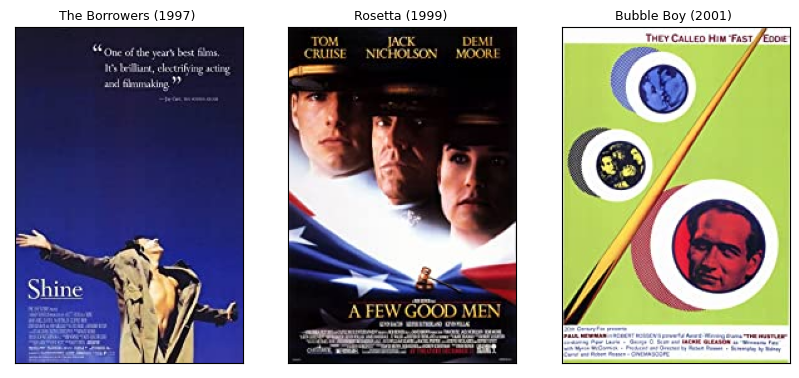

In [209]:
# 显示用户i最爱的3部电影
user = 2
user_i_movies = result[result['user_id'] == user]['movie_id']
    
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
for i, movie_id in enumerate(user_i_movies):
    poster = cv2.imread('data/poster/'+ str(movie_id) + '.jpg', 1)
    poster = cv2.cvtColor(poster, cv2.COLOR_BGR2RGB)
    axs[i].imshow(poster)
    axs[i].set_title(movies_info.loc[movie_id]['name'], size=9)
    axs[i].set_xticks(())
    axs[i].set_yticks(())
plt.show()

### ⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云 等。

#### 打标签

In [488]:
df = pd.merge(ratings, movies, on='movie_id')

# 对movie_id进行分组，计算平均评分
movie_ratings = df.groupby('movie_id')['rating'].mean().reset_index()

# 合并回df
df = pd.merge(df, movie_ratings, on='movie_id', suffixes=['', '_mean'])

#电影被评分过的次数
df['rating_count'] = df.groupby('movie_id')['rating'].transform('count')

#增加label列
df['label'] = ''

In [489]:
# 对Animation Children's 标记 少儿最爱
df.loc[(df['genres'].str.contains('Animation')) | (df['genres'].str.contains("Children's"))
       & (df['rating_mean'] > 3.5), 'label'] += '少儿最爱|'

# 对Comedy类型且平均评分高于3.5的标记为 下饭神剧
df.loc[(df['genres'].str.contains('Comedy')) & (df['rating_mean'] > 3.5), 'label'] += '下饭神剧|'

# 对sci-fi类型且平均分高于3.5的 标记为 烧脑神剧
df.loc[(df['genres'].str.contains('Sci-Fi')) & (df['rating_mean'] > 3.5), 'label'] += '烧脑神剧|'

# 对类型为documentary且平均分高于3.5的 标记为 纪实佳作
df.loc[(df['genres'].str.contains('Documentary')) & (df['rating_mean'] > 3.5), 'label'] += '纪实佳作|'

# 对类型为romance且平均分高于3.5的 标记为 浪漫不败
df.loc[(df['genres'].str.contains('Romance')) & (df['rating_mean'] > 3.5), 'label'] += '浪漫不败|'

# 对类型为Western且平均分高于3.5的 标记为 异域文化
df.loc[(df['genres'].str.contains('Western')) & (df['rating_mean'] > 3.5), 'label'] += '异域文化|'

# 对类型为Thriller或Crime或Action且平均分高于3.5的 标记为 肾上腺素飙升
df.loc[((df['genres'].str.contains('Action')) | (df['genres'].str.contains("Crime"))
        | (df['genres'].str.contains("Thriller")))& (df['rating_mean'] > 3.5), 'label'] += '肾上腺素飙升|'

# 对评分人数大于100且平均分低于2的 标记为 究极烂片
df.loc[(df['rating_count'] > 100)& (df['rating_mean'] < 2.0), 'label'] += '究极烂片|'

# 对评分人数小于20且平均分高于4的 标记为 冷门好片
df.loc[(df['rating_count'] < 20 )& (df['rating_mean'] > 4.0), 'label'] += '冷门好片|'

# 对评分人数大于300人且年份在1990年以前的平均评分高于4.0 标为 经典神作
df.loc[(df['rating_count'] > 300 ) & (df['rating_mean'] > 4.0) 
       & ('(20' not in df['title'])& ('(199' not in df['title']), 'label'] += '经典神作|'

In [490]:
df = pd.merge(df, users, on='user_id')

In [491]:
#统计每部电影的最多的职业受众
max_occupations = df.groupby(['movie_id', 'occ_desc'])['user_id'].count().reset_index()
max_occupations = max_occupations.sort_values(['movie_id', 'user_id'], ascending=[True, False])

most_popular_occupations = max_occupations.groupby('movie_id').first()
most_popular_occupations = most_popular_occupations.reset_index()
most_popular_occupations = most_popular_occupations.drop('user_id', axis=1)
most_popular_occupations = most_popular_occupations.rename(columns={'occ_desc': 'occ_most'})
#most_popular_occupations

In [492]:
df = pd.merge(df, most_popular_occupations, on='movie_id')
#df

In [493]:
# 对受众最多为homemaker的且平均分高于4.0标为家庭主妇最爱
df.loc[(df['occ_most'] == 'homemaker') & (df['rating_mean'] > 4.0), 'label'] += '家庭主妇最爱|'

# 对受众最多为技术人员的且平均分高于4.0标为技术人员最爱
df.loc[((df['occ_most'] == 'programmer') | (df['occ_most'] == 'technician/engineer')
        ) & (df['rating_mean'] > 4.0), 'label'] += '技术人员最爱|'

In [494]:
#统计每部电影的最多的年龄受众
max_age = df.groupby(['movie_id', 'age_desc'])['user_id'].count().reset_index()
max_age = max_age.sort_values(['movie_id', 'user_id'], ascending=[True, False])

most_popular_age = max_age.groupby('movie_id').first()
most_popular_age = most_popular_age.reset_index()
most_popular_age = most_popular_age.drop('user_id', axis=1)
most_popular_age = most_popular_age.rename(columns={'age_desc': 'age_most'})
#most_popular_age

In [495]:
df = pd.merge(df, most_popular_age, on='movie_id')
#df

In [496]:
# 对受众最多为56+的且平均分高于4.0标为老年人最爱
df.loc[(df['age_most'] == '56+') & (df['rating_mean'] > 4.0), 'label'] += '老年人最爱|'

# 对受众最多为50-55的且平均分高于4.0标为老年人最爱
df.loc[(df['age_most'] == '50-55') & (df['rating_mean'] > 4.0), 'label'] += '老年人最爱|'

#### 生成词云

In [497]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
import jieba

# 定义标签
labels = ['少儿最爱', '下饭神剧', '烧脑神剧', '纪实佳作', '浪漫不败','异域文化','肾上腺素飙升','究极烂片','冷门好片',
          '经典神作', '家庭主妇最爱','技术人员最爱','老年人最爱']
label_dict = {i: labels[i] for i in range(len(labels))}

# 计算每个用户对各标签的偏好程度
user_labels = {}
for user_id in df['user_id'].unique():
    user_df = df[df['user_id'] == user_id]
    user_label_pref = {}
    for label in labels:
        #该用户看过的该label的电影
        label_movies = user_df[user_df['label'].str.contains(label)]
        #喜欢该种label的电影的程度
        label_pref = len(label_movies)
        user_label_pref[label] = label_pref
    user_labels[user_id] = user_label_pref

In [498]:
print(len(labels))

13


In [499]:
df

,user_id,movie_id,rating,timestamp,title,genres,rating_mean,rating_count,label,gender,zipcode,age_desc,occ_desc,occ_most,age_most
0,2,1357,5,978298709,Shine (1996),Drama|Romance,3.7921,481,浪漫不败|,M,70072,56+,self-employed,academic/educator,25-34
1,8,1357,4,978230800,Shine (1996),Drama|Romance,3.7921,481,浪漫不败|,M,11413,25-34,programmer,academic/educator,25-34
2,10,1357,5,978227625,Shine (1996),Drama|Romance,3.7921,481,浪漫不败|,F,95370,35-44,academic/educator,academic/educator,25-34
3,18,1357,5,978156876,Shine (1996),Drama|Romance,3.7921,481,浪漫不败|,F,95825,18-24,clerical/admin,academic/educator,25-34
4,33,1357,4,978109488,Shine (1996),Drama|Romance,3.7921,481,浪漫不败|,M,55421,45-49,clerical/admin,academic/educator,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847297,5420,1843,3,960156505,Slappy and the Stinkers (1998),Children's|Comedy,3.0000,1,,F,14850,Under 18,unemployed,unemployed,Under 18
847298,3790,889,2,966019187,1-900 (1994),Romance,2.0000,1,,F,94618,25-34,technician/engineer,technician/engineer,25-34
847299,5059,1434,4,962484364,"Stranger, The (1994)",Action,4.0000,2,肾上腺素飙升|,M,22652,45-49,self-employed,self-employed,45-49
847300,5947,1434,4,957190428,"Stranger, The (1994)",Action,4.0000,2,肾上腺素飙升|,F,97215,45-49,self-employed,self-employed,45-49


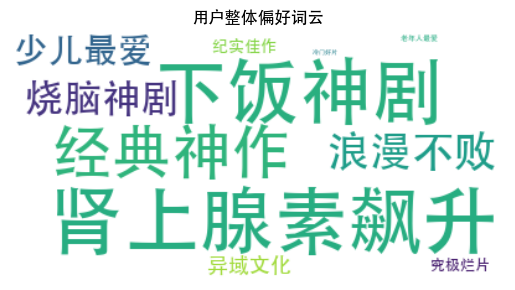

In [500]:
# 设置中文字体
plt.rcParams['font.family'] = 'Heiti TC'

# 生成词云图
plt.title('用户整体偏好词云')

# 按照'|'分割标签
label_counts = df['label'].str.split('|', expand=True).stack().value_counts()

font = '/System/Library/Fonts/STHeiti Medium.ttc'
wordcloud = WordCloud(background_color="white",font_path=font).generate_from_frequencies(label_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

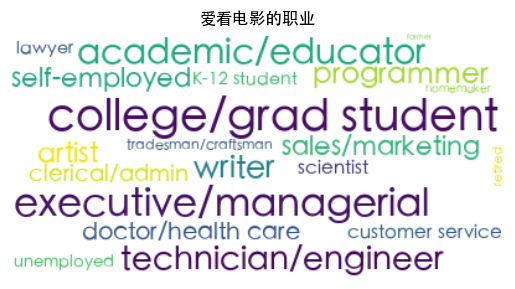

In [501]:
# 生成词云图
plt.title('爱看电影的职业')

# 按照'|'分割标签
label_counts = df['occ_desc'].value_counts()

#把other or not specified项去掉
label_counts = label_counts.drop('other or not specified')

font = '/System/Library/Fonts/STHeiti Medium.ttc'
wordcloud = WordCloud(background_color="white",font_path=font).generate_from_frequencies(label_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

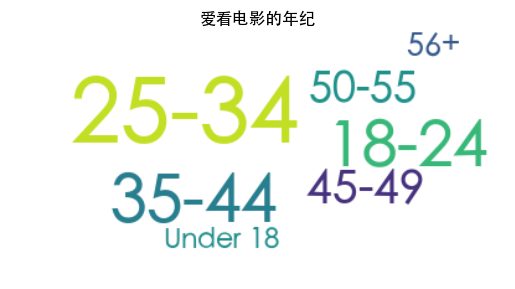

In [502]:
# 生成词云图
plt.title('爱看电影的年纪')

# 按照'|'分割标签
label_counts = df['age_desc'].value_counts()

font = '/System/Library/Fonts/STHeiti Medium.ttc'
wordcloud = WordCloud(background_color="white",font_path=font).generate_from_frequencies(label_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

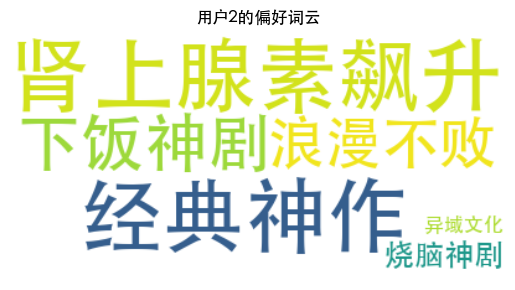

In [503]:
# 得到特定用户的观影偏好词图
user = 2 #该用户的user_id 一位56+ 的 male self-employed

# 生成词云图
plt.title('用户' + str(user) + '的偏好词云')

font = '/System/Library/Fonts/STHeiti Medium.ttc'
wordcloud = WordCloud(background_color="white",font_path=font).generate_from_frequencies(user_labels[user])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

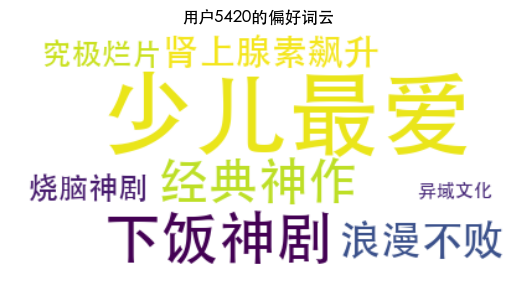

In [504]:
# 得到特定用户的观影偏好词图
user = 5420 #该用户的user_id 一位under18的female unemployed
user_preferences = user_labels[user]

# 生成词云图
plt.title('用户' + str(user) + '的偏好词云')

font = '/System/Library/Fonts/STHeiti Medium.ttc'
wordcloud = WordCloud(background_color="white",font_path=font).generate_from_frequencies(user_preferences)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [566]:
from matplotlib.font_manager import FontProperties

user = 2

# 假设用户对以下标签的偏好程度分别为
labels = ['少儿最爱', '下饭神剧', '烧脑神剧', '纪实佳作', '浪漫不败','异域文化','肾上腺素飙升','究极烂片','冷门好片',
          '经典神作', '家庭主妇最爱','技术人员最爱','老年人最爱']
user_preferences = user_labels[user]
user_preferences = user_preferences.values()
user_preferences = list(user_preferences)


labels_ = [label for pref, label in zip(user_preferences, labels) if pref != 0]
user_preferences_ = [pref for pref, label in zip(user_preferences, labels) if pref != 0]
labels = labels_
user_preferences = user_preferences_

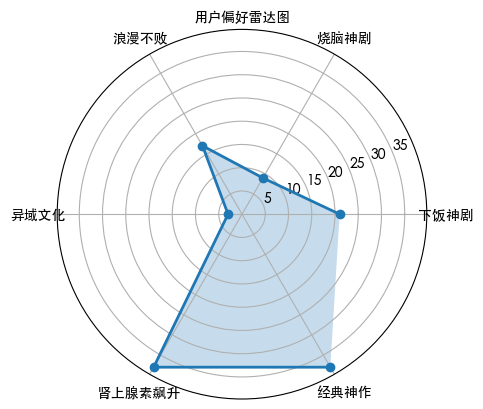

In [567]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

font = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc', size=10)
# 绘图
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, user_preferences, 'o-', linewidth=2)
ax.fill(angles, user_preferences, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties=font)
ax.set_title("用户偏好雷达图", fontproperties=font)
ax.grid(True)

plt.show()